<a href="https://colab.research.google.com/github/YY2mk/KT_aivle/blob/master/DeepLearning/DX_%EB%94%A5%EB%9F%AC%EB%8B%9D%20%EA%B8%B0%EC%B4%88_2%EC%9D%BC%EC%B0%A8%20%EC%8B%A4%EC%8A%B5%EC%9E%90%EB%A3%8C/06%EA%B3%BC_2_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98_%EC%8B%A4%EC%8A%B5_%EC%99%80%EC%9D%B8%ED%92%88%EC%A7%88%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 와인 품질 예측하기


![](https://labelyourdata.com/img/article-illustrations/ml_essential_tool.jpg)

## 1.환경준비

### (1) 라이브러리 로딩

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.utils import to_categorical

* 함수 만들기

In [2]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [3]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/winequality-white.csv"
data = pd.read_csv(path)
data['quality'] = np.where(data['quality'] == 3, 4, np.where(data['quality'] == 9, 8, data['quality']))
data['quality'] = data['quality'] - 4
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2


* 범주가 5개 입니다.
    * 0 - 최하  ~  4 - 최상

In [4]:
data['quality'].value_counts()

quality
2    2198
1    1457
3     880
0     183
4     180
Name: count, dtype: int64

## 2.데이터 준비

### (1) 데이터 준비
* y에 대한 전처리 : 위에서 이미 0 ~ 4로 범주를 맞췄습니다.
* x, y 나누기

In [5]:
target = 'quality'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (2) 데이터 분할

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size= .2, random_state = 2024)

### (3) 스케일링

In [7]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링

최소 3개 이상의 모델을 생성하고 성능을 비교하시오.

In [8]:
n = x_train.shape[1] #num of columns
n

11

### (1) 모델1

In [27]:
clear_session()
model1 = Sequential(Dense(5, input_shape=(n,) ,activation='softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 60        
                                                                 
Total params: 60 (240.00 Byte)
Trainable params: 60 (240.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model1.compile(optimizer=Adam(0.01), loss='sparse_categorical_crossentropy')
hist = model1.fit(x_train, y_train, epochs=100, validation_split=.2).history

Epoch 1/100
98/98 [==============================] - 1s 5ms/step - loss: 1.3017 - val_loss: 1.2528
Epoch 2/100
98/98 [==============================] - 0s 3ms/step - loss: 1.2065 - val_loss: 1.2241
Epoch 3/100
98/98 [==============================] - 0s 3ms/step - loss: 1.1789 - val_loss: 1.2042
Epoch 4/100
98/98 [==============================] - 0s 3ms/step - loss: 1.1614 - val_loss: 1.1950
Epoch 5/100
98/98 [==============================] - 0s 4ms/step - loss: 1.1484 - val_loss: 1.1863
Epoch 6/100
98/98 [==============================] - 0s 4ms/step - loss: 1.1375 - val_loss: 1.1843
Epoch 7/100
98/98 [==============================] - 0s 3ms/step - loss: 1.1294 - val_loss: 1.1722
Epoch 8/100
98/98 [==============================] - 0s 2ms/step - loss: 1.1241 - val_loss: 1.1667
Epoch 9/100
98/98 [==============================] - 0s 2ms/step - loss: 1.1172 - val_loss: 1.1626
Epoch 10/100
98/98 [==============================] - 0s 3ms/step - loss: 1.1124 - val_loss: 1.1662
Epoch 11/

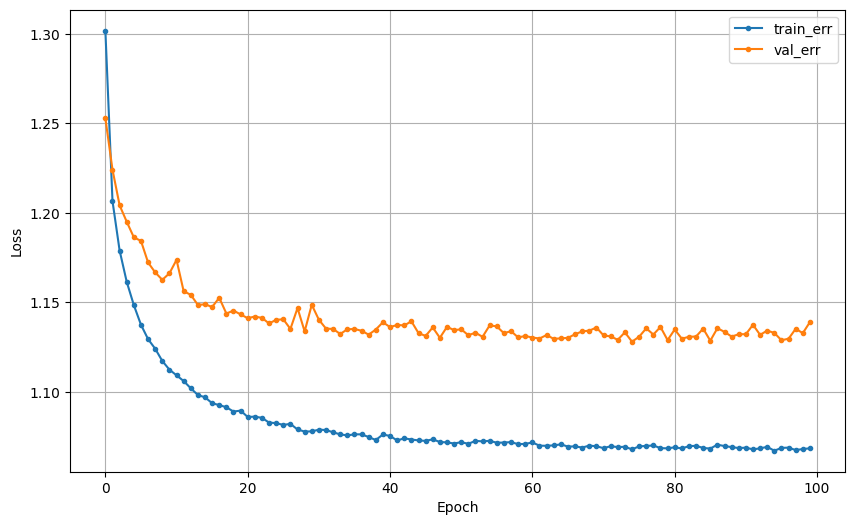

In [29]:
dl_history_plot(hist)

In [26]:
pred = model1.predict(x_val)
pred = np.argmax(pred, axis=1)

31/31 [==============================] - 0s 2ms/step


In [30]:
print(confusion_matrix(y_val, pred))
print(classification_report(y_val, pred))

[[  2  20  11   0   0]
 [  1 164 126   8   0]
 [  2  90 297  46   0]
 [  0   0 121  55   1]
 [  0   0  16  20   0]]
              precision    recall  f1-score   support

           0       0.40      0.06      0.11        33
           1       0.60      0.55      0.57       299
           2       0.52      0.68      0.59       435
           3       0.43      0.31      0.36       177
           4       0.00      0.00      0.00        36

    accuracy                           0.53       980
   macro avg       0.39      0.32      0.33       980
weighted avg       0.50      0.53      0.51       980



### (2) 모델2

In [66]:
clear_session()
model2 = Sequential([Dense(16, input_shape=(n,) ,activation='relu'),
                     Dense(5, activation='relu'),
                     Dense(5, activation='softmax')])
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 5)                 85        
                                                                 
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
Total params: 307 (1.20 KB)
Trainable params: 307 (1.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
model2.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy')
hist = model2.fit(x_train, y_train, epochs=100, validation_split=.2).history

Epoch 1/100
98/98 [==============================] - 3s 13ms/step - loss: 1.4852 - val_loss: 1.4177
Epoch 2/100
98/98 [==============================] - 1s 10ms/step - loss: 1.3396 - val_loss: 1.3185
Epoch 3/100
98/98 [==============================] - 1s 7ms/step - loss: 1.2696 - val_loss: 1.2792
Epoch 4/100
98/98 [==============================] - 1s 8ms/step - loss: 1.2393 - val_loss: 1.2631
Epoch 5/100
98/98 [==============================] - 1s 8ms/step - loss: 1.2228 - val_loss: 1.2519
Epoch 6/100
98/98 [==============================] - 1s 8ms/step - loss: 1.2109 - val_loss: 1.2443
Epoch 7/100
98/98 [==============================] - 0s 4ms/step - loss: 1.2004 - val_loss: 1.2419
Epoch 8/100
98/98 [==============================] - 0s 4ms/step - loss: 1.1928 - val_loss: 1.2321
Epoch 9/100
98/98 [==============================] - 1s 6ms/step - loss: 1.1846 - val_loss: 1.2278
Epoch 10/100
98/98 [==============================] - 0s 5ms/step - loss: 1.1783 - val_loss: 1.2209
Epoch 1

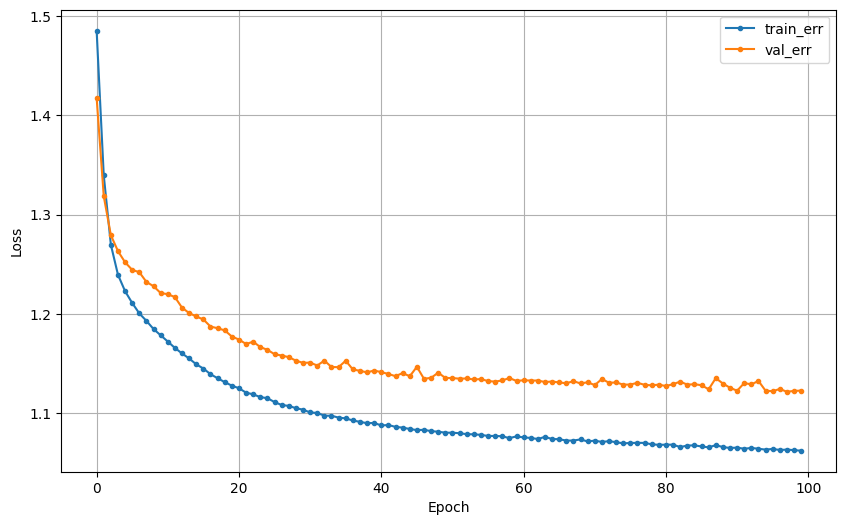

In [68]:
dl_history_plot(hist)

In [69]:
pred = model2.predict(x_val)
pred = np.argmax(pred, axis=1)

31/31 [==============================] - 0s 1ms/step


In [70]:
print(confusion_matrix(y_val, pred))
print(classification_report(y_val, pred))

[[  0  24   9   0   0]
 [  0 162 134   3   0]
 [  0  89 326  20   0]
 [  0   6 134  37   0]
 [  0   0  26  10   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.58      0.54      0.56       299
           2       0.52      0.75      0.61       435
           3       0.53      0.21      0.30       177
           4       0.00      0.00      0.00        36

    accuracy                           0.54       980
   macro avg       0.32      0.30      0.29       980
weighted avg       0.50      0.54      0.50       980



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### (3) 모델3

In [143]:
y_ = to_categorical(y.values, 5)

In [144]:
x_train, x_val, y_train, y_val = train_test_split(x, y_, test_size = .2, random_state = 2024)

In [145]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

In [146]:
n = x_train.shape[1] #num of columns
n

11

In [147]:
# 메모리 정리
clear_session()

# Sequential
model3 = Sequential([Dense(10, input_shape=(n,) ,activation='relu'),
                     Dense(8, activation='relu'),
                     Dense(8, activation='relu'),
                     Dense(5, activation='softmax')])

# 모델요약
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 5)                 45        
                                                                 
Total params: 325 (1.27 KB)
Trainable params: 325 (1.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [148]:
model3.compile(optimizer=Adam(0.001), loss='categorical_crossentropy')

hist = model3.fit(x_train, y_train, epochs=100, validation_split=0.2).history


Epoch 1/100
98/98 [==============================] - 1s 5ms/step - loss: 1.5277 - val_loss: 1.3785
Epoch 2/100
98/98 [==============================] - 0s 3ms/step - loss: 1.2951 - val_loss: 1.2945
Epoch 3/100
98/98 [==============================] - 0s 3ms/step - loss: 1.2613 - val_loss: 1.2846
Epoch 4/100
98/98 [==============================] - 0s 3ms/step - loss: 1.2427 - val_loss: 1.2655
Epoch 5/100
98/98 [==============================] - 0s 3ms/step - loss: 1.2171 - val_loss: 1.2421
Epoch 6/100
98/98 [==============================] - 0s 3ms/step - loss: 1.1882 - val_loss: 1.2227
Epoch 7/100
98/98 [==============================] - 0s 3ms/step - loss: 1.1615 - val_loss: 1.2074
Epoch 8/100
98/98 [==============================] - 0s 3ms/step - loss: 1.1395 - val_loss: 1.1865
Epoch 9/100
98/98 [==============================] - 0s 3ms/step - loss: 1.1209 - val_loss: 1.1734
Epoch 10/100
98/98 [==============================] - 0s 3ms/step - loss: 1.1087 - val_loss: 1.1654
Epoch 11/

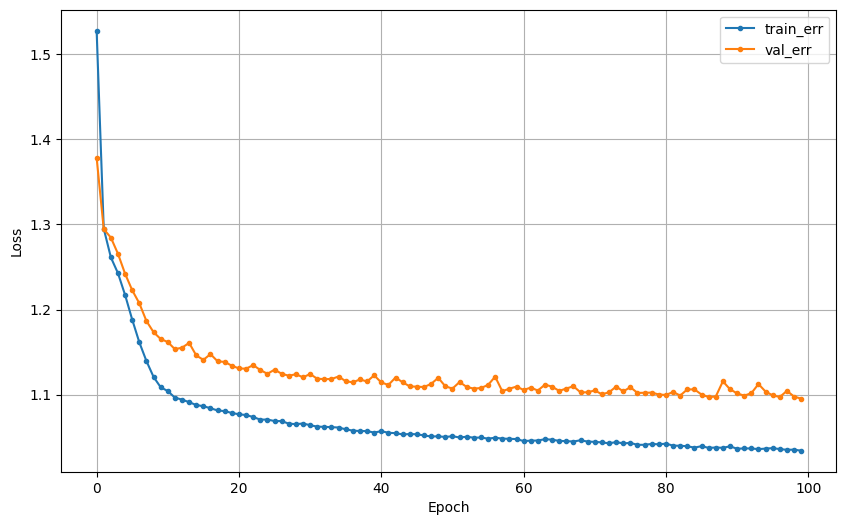

In [149]:
dl_history_plot(hist)

In [150]:
pred = model3.predict(x_val)
pred = pred.argmax(axis=1)

31/31 [==============================] - 0s 2ms/step


In [151]:
y_val = y_val.argmax(axis=1)

In [152]:
print(confusion_matrix(y_val, pred)) # 다중 분류에서 이 부분 잘 살펴야 함
print(classification_report(y_val, pred))

[[  1  23   7   2   0]
 [  1 177 113   8   0]
 [  0  92 290  53   0]
 [  0   1 111  65   0]
 [  0   0  19  17   0]]
              precision    recall  f1-score   support

           0       0.50      0.03      0.06        33
           1       0.60      0.59      0.60       299
           2       0.54      0.67      0.59       435
           3       0.45      0.37      0.40       177
           4       0.00      0.00      0.00        36

    accuracy                           0.54       980
   macro avg       0.42      0.33      0.33       980
weighted avg       0.52      0.54      0.52       980



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
